Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel$\rightarrow$Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell$\rightarrow$Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:


In [2]:
NAME = "Piotr Durniat"

---


# Wprowadzenie do programowania probabilistycznego

W tym notebooku zawarte są zadania wprowadzające do rachunku prawdopodobieństwa i statystyki w środowisku python oraz programowania probabilistycznego.


## Rachunek prawdopodobieństwa

Rachunek prawdopodobieństwa, czyli dział matematyki zajmujący się niepewnością i losowością, stanowi podstawę rozpoznawania wzorców. Umożliwia on ujęcie ilościowe niepewności wynikającej np. z szumów występujących w danych lub też ograniczonej ich ilości, dzięki czemu możemy wykonywać predykcje na podstawie danych, które są niekompletne lub niejednoznaczne.

W zadaniu będziemy posługiwać się przykładem. Wyobraźmy sobie dwa pudełka: jedno czerwone i jedno niebieskie. Czerwone pudełko zawiera w sobie 4 jabłka i 6 pomarańczy, natomiast niebieskie zawiera 7 jabłek i 3 pomarańcze. Załóżmy, że:

- losowo wybieramy jedno z pudełek i z tego pudełka losowo wybieramy owoc, a po zaobserwowaniu co to za owoc, zwracamy go do pudełka
- czerwone pudełko wybieramy 30% razy, a niebieskie 70% razy
- szansa na wybór każdego z owoców jest taka sama

W tym przykładzie, wybór pudełka jest **zmienną losową**; oznaczmy ją jako $B$. Zmienna ta może przyjmować dwie wartości: $B=r$ (czerwone pudełko) albo $B=b$ (niebieskie pudełko). Analogicznie, wybór owocu jest również zmienną losową; oznaczmy ją jako $F$ - wówczas $F=a$ oznacza wybór jabłka, a $F=o$ oznacza wybór pomarańczy.

Prawdopodobieństwo wyboru czerwonego pudełka wynosi $\Pr(B=r) = 0.3$, natomiast prawdopodobieństwo wyboru niebieskiego pudełka to $\Pr(B=b) = 0.7$. Są to zdarzenia rozłączne oraz obejmują wszystkie możliwe wyniki, zatem suma prawdopodobieństw ich wystąpienia wynosi $\Pr(B=r) + \Pr(B=b) = 1$.


### Zadanie 1.1a (0,25 p.)

Załóżmy, że powtarzamy powyższy schemat czterokrotnie w celu wylosowania czterech owoców (kolejność nie jest istotna). Podaj przestrzeń zdarzeń elementarnych dla doświadczenia losowego. Zapisz ją w formie listy krotek odpowiednich znaków (np. `[("a", "b"), ("c", "d")]` i przypisz do zmiennej `space_1`.


In [12]:
# "a" - apple
# "o" - orange
# kolejność nie istotna - liczy się tylko liczba jabłek i pomarańczy w krotce
space_1 = [
    ("a", "a", "a", "a"),
    ("a", "a", "a", "o"),
    ("a", "a", "o", "o"),
    ("a", "o", "o", "o"),
    ("o", "o", "o", "o"),
]

In [13]:
assert type(space_1) == list
for sample in space_1:
    assert type(sample) == tuple
    assert len(sample) == 4
    for item in sample:
        assert type(item) == str
        assert len(item) == 1
        assert item in {"a", "o", "b", "r"}

### Zadanie 1.1b (0,25 p.)

Drugie z doświadczeń polega na wylosowaniu pary ${B, F}$: najpierw losujemy pudełko, a następnie losujemy z niego owoc. Podaj przestrzeń zdarzeń dla tak zdefiniowanego doświadczenia losowego. Zapisz je w postaci listy krotek (np. `[("a", "b"), ("c", "d")]` i przypisz do zmiennej `space_2`.


In [5]:
# B (Box):
# - "b" - blue
# - "r" - red

# F (Fruit):
# - "a" - apple
# - "o" - orange

space_2 = [
    ("b", "a"),
    ("b", "o"),
    ("r", "a"),
    ("r", "o"),
]

In [6]:
assert type(space_2) == list
for sample in space_2:
    assert type(sample) == tuple
    assert len(sample) == 2
    assert sample[0] in {"r", "b"}
    assert sample[1] in {"a", "o"}
    assert all(type(item) == str for item in sample)

Uogólniając powyższy przykład, rozważmy dwie zmienne losowe $X$ i $Y$. Zmienna $X$ może przyjąć dowolną wartość $x \in \{x_1, x_2, \ldots, x_M\}$, a zmienna $Y$ może przyjąć wartości $y \in \{y_i, y_2, \ldots, y_L\}$. Rozważmy, że $N$ razy próbkujemy wartości obu zmiennych $X$ i $Y$; liczba prób, w których $X=x_i$ i $Y=y_j$ wynosi $n_{ij}$. Ponadto, załózmy, że liczba przypadków, gdzie $X$ przyjmuje wartość $x_i$ (bez względu na wartość $Y$) to $c_i$; analogicznie liczba prób, gdy $Y=y_j$ oznaczamy przez $r_j$.

**Prawdopodobieństwo łączne**, tzn. prawdopodobieństwo, że zmienna $X$ przyjmie wartość $x_i$ oraz że $Y$ przyjmie wartość $y_j$ definiuje się jako:

$$\Pr(X=x_i, Y=y_j) = \frac{n_{ij}}{N}\tag{1}$$

Implicite rozważamy tu granicę przy $N\rightarrow\infty$. Analogicznie, **prawdopodobieństwo brzegowe**, tzn. prawdopodobieństwo, że $X$ przyjmuje wartość $x_i$ bez względu na wartość $Y$ można zapisać jako:

$$\Pr(X=x_i) = \frac{c_i}{N}\tag{2}$$


### Zadanie 1.2 (0,25 p.)

W doświadczeniu losowym z pudełkami i owocami, rozpisz liczby wystąpień każdego z przypadków w tablicy dwudzielczej, które dadzą określone wcześniej prawdopodobieństwa, przekształcając powyższe wzory i przypisując odpowiednie wartości do zmiennych zadeklarowanych w tablicy. Tablica dwudzielcza to tabela przedstawiająca łączny rozkład dwóch zmiennych: każda komórka zawiera liczbę wystąpień kombinacji wartości zmiennych. Załóż, że wykonano $N=100$ prób.

| B / F | B=r            | B=b            |                      |
| ----- | -------------- | -------------- | -------------------- |
| F=a   | `n_ra`         | `n_ba`         | $$\sum_B=r_a$$       |
| F=o   | `n_ro`         | `n_bo`         | $$\sum_B=r_o$$       |
|       | $$\sum_F=c_r$$ | $$\sum_F=c_b$$ | $$\sum_B\sum_F = N$$ |


In [7]:
p_r = 0.3
p_b = 0.7

# Probability of picking an apple if the box is red
p_a_if_r = 0.4
p_o_if_r = 0.6

p_a_if_b = 0.7
p_o_if_b = 0.3

n = 100

n_ra = p_r * p_a_if_r * n
n_ro = p_r * p_o_if_r * n
n_ba = p_b * p_a_if_b * n
n_bo = p_b * p_o_if_b * n

In [8]:
assert n_ra + n_ro + n_ba + n_bo == 100

Marginalizacja polega na przejściu z rozkładu łącznego na rozkład brzegowy. Patrząc na tablicę dwudzielną, polega ona na zsumowaniu liczby wystąpień w wierszach albo kolumnach i podzieleniu przez całkowitą liczbę próbek (**reguła brzegowa**).

$$\Pr(X=x_i) = \sum_{j=1}^L \Pr(X=x_i, Y=y_j)\tag{3}$$

Jeżeli rozważymy przykłady, dla których $X=x_i$, wówczas część spośród nich, dla których $Y=y_j$ określa się mianem **prawdopodbieństwa warunkowego**:

$$\Pr(Y=y_j \mid X=x_i) = \frac{n_{ij}}{c_i}\tag{4}$$

Stąd też wynika zależność - **reguła łańcuchowa**:

$$\Pr(X=x_i, Y=y_j) = \frac{n_{ij}}{N} = \frac{n_{ij}}{c_i} \frac{c_i}{N} = \Pr(Y=y_j \mid X=x_i)\Pr(X=x_i)\tag{5}$$


### Zadanie 1.3 (0,25 p.)

Oblicz wartości prawdopodobieństwa warunkowego dla wcześniejszego doświadczenia losowego:

| prawdopodobieństwo    | zmienna   |
| --------------------- | --------- |
| $$\Pr(F=a \mid B=r)$$ | `p_fa_br` |
| $$\Pr(F=o \mid B=r)$$ | `p_fo_br` |
| $$\Pr(F=a \mid B=b)$$ | `p_fa_bb` |
| $$\Pr(F=o \mid B=b)$$ | `p_fo_bb` |
| $$\Pr(B=r \mid F=a)$$ | `p_br_fa` |
| $$\Pr(B=b \mid F=a)$$ | `p_bb_fa` |
| $$\Pr(B=r \mid F=o)$$ | `p_br_fo` |
| $$\Pr(B=b \mid F=o)$$ | `p_bb_fo` |


In [9]:
c_r = n_ra + n_ro
c_b = n_ba + n_bo

r_a = n_ra + n_ba
r_o = n_ro + n_bo

p_fa_br = n_ra / c_r
p_fo_br = n_ro / c_r
p_fa_bb = n_ba / c_b
p_fo_bb = n_bo / c_b
p_br_fa = n_ra / r_a
p_bb_fa = n_ba / r_a
p_br_fo = n_ro / r_o
p_bb_fo = n_bo / r_o

In [10]:
# testy ukryte

Przekształcając równanie reguły łańcuchowej $(5)$ oraz reguły brzegowej $(3)$ oraz wykorzystując właściwość, że $\Pr(X, Y) = \Pr(Y, X)$, uzyskujemy zależność pomiędzy prawdopodobieństwami warunkowymi:

$$\Pr(Y \mid X) = \frac{\Pr(X \mid Y) \Pr(Y)}{\Pr(X)}\tag{6}$$

Zależność ta nazywana jest **regułą Bayesa** i pełni ona centralną rolę w probabilistycznym uczeniu maszynowym. Wykorzystując ponownie regułę brzegową $(3)$, mianownik równania $(6)$ można przedstawić w postaci:

$$\Pr(X) = \sum_Y \Pr(X \mid Y) \Pr(Y)\tag{7}$$

Można go zatem potraktować jako "stałą normalizującą", gwarantującą, że prawdopodobieństwo warunkowe $\Pr(Y \mid X)$ sumuje się do $1$.


### Zadanie 1.4 (0,5 p.)

Test diagnostyczny dotyczący pewnej choroby ma następujące parametry:

- jeżeli pacjent jest chory ($Y=1$), to prawdopodobieństwo, że test diagnostyczny dał wynik pozytywny ($X=1$) wynosi $0.9$ (_czułość testu_ - stosunek wyników prawdziwie dodatnich do sumy prawdziwie dodatnich i fałszywie ujemnych)
- prawdopodobieństwo że osoba jest chora na tę chorobę ($Y=1$) wynosi $0.014$
- jeżeli pacjent nie jest chory ($Y=0$), to prawdopodobieństwo, że test dał wynik negatywny ($X=0$) wynosi $0.97$ (_swoistość testu_ - stosunek wyników prawdziwie ujemnych od sumy prawdziwie ujemnych i fałszywie dodatnich)

1. Zapisz te prawdopodobieństwa używając notacji matematycznej
1. Wyprowadź równania potrzebne do obliczenia prawdopodobieństwa, że pacjent jest chory, jeżeli test wyszedł pozytywny; oblicz to prawdopodobieństwo

Zapisz wynik w zmiennej `p_y1_x1`.


- $P(X=1\mid  Y=1) = 0.9$
- $P(Y=1) = 0.014$
- $P(X=0\mid  Y=0) = 0.97$

Z prawa całkowitego prawdopodobieństwa:

- $P(Y=0) = 1-P(Y=1)$
- $P(X=1\mid Y=0) = 1 - P(X=0\mid Y=0)$

Z prawa Bayesa:

$$
P(Y=1\mid X=1) =
$$

$$
= \frac{P(X=1 \mid  Y=1) P(Y=1)}{P(X=1)} =
$$

$$
= \frac{P(X=1 \mid  Y=1) P(Y=1)}
{\sum_Y P(X=1 \mid  Y) P(Y)} =
$$

$$
= \frac{P(X=1 \mid  Y=1) P(Y=1)}
{P(X=1 \mid  Y=1) P(Y=1) + P(X=1 \mid  Y=0) P(Y=0)} =
$$

$$
= \frac{P(X=1 \mid  Y=1) P(Y=1)}
{P(X=1 \mid  Y=1) P(Y=1) + (1 - P(X=0\mid Y=0))(1-P(Y=1))} =
$$

$$
= \frac{0.9 \cdot 0.014}{0.9 \cdot 0.014 + (1-0.03) \cdot (1-0.014)} \approx

0.299
$$


In [11]:
p_x1_y1 = 0.9
p_y1 = 0.014
p_x0_y0 = 0.97

p_y1_x1 = p_x1_y1 * p_y1 / (p_x1_y1 * p_y1 + (1 - p_x0_y0) * (1 - p_y1))

print(p_y1_x1)

0.2987197724039828


In [24]:
# testy ukryte

### Rozkłady prawdopodobieństwa

Oprócz opisywanych wcześniej zmiennych losowych dyskretnych, prawdopodobieństwa mogą dotyczyć również zmiennych ciągłych. Rozkład prawdopodobieństa zmiennych ciągłych opisany jest **funkcją gęstości** $p(x)$. Prawdopodobieństwo, że zmienna losowa $X$ przyjmuje wartości z przedziału $[a, b]$ można wyznaczyć przy pomocy równania:

$$\Pr(a \le X \le b) = \int_a^b p(x) dx\tag{8}$$

Funkcja gęstości spełnia dwa kryteria:

- $p(x) \ge 0$ - prawdopodobieństwo jest nieujemne,
- $\int_{-\infty}^{\infty} p(x) dx = 1$ - całkowite prawdopodobieństwo jest równe $1$.

**Dystrybuantą**, czyli funkcją skumulowanej gęstości prawdopodobieństwa nazywamy prawdopodobieństwo, że $x$ leży w przedziale $(-\infty, z)$:

$$F(z) = \int_{-\infty}^z p(x) dx\tag{9}$$

Dla zmiennych dyskretnych funkcja $p(x)$ jest nazywana **funkcją masy prawdopodobieństwa**.

Załóżmy, że $x$ i $y$ są dwoma zmiennymi ciągłymi. Funkcja gęstości spełnia reguły:

- brzegową: $p(x) = \int p(x, y) dy$
- łańcuchową: $p(x, y) = p(x \mid y)p(y)$
- Bayesa: $p(y \mid x) = \frac{p(x \mid y) p(y)}{p(x)}$

#### Własności rozkładu prawdopodobieństwa

Podstawową własnością rozkładu jest **wartość oczekiwana**, określająca spodziewany wynik doświadczenia losowego. Dla rozkładu dyskretnego dany jest wzorem:

$$\mathbb{E}[X] = \sum_{x\in\mathcal{X}} x \cdot p(x)\tag{10}$$

natomiast dla rozkładu ciągłego definiuje się:

$$\mathbb{E}[X] = \int_{x\in\mathcal{X}} x \cdot p(x) dx\tag{11}$$

**Wariancja** to własność określająca jak bardzo wartości $x$ odchylają się od średniej (_rozpiętość rozkładu_)

$$Var[X] = \mathbb{E}[(X - \mathbb{E}[X])^2] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2\tag{12}$$

**Odchylenie standardowe** definiowane jest jako pierwiastek z wariancji:

$$std[X] = \sqrt{Var[X]}\tag{13}$$

Dla dwóch zmiennych losowych $X$ i $Y$, **kowariancja** określa stopień, w jakim zależą od siebie liniowo. Dana jest ona wzorem:

$$cov[X, Y] = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])] = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y] \in [0, \infty)\tag{14}$$

**Korelacja** jest znormalizowana postacią kowariancji:

$$corr[X, Y] = \frac{cov[X, Y]}{\sqrt{Var[X]Var[Y]}} \in [-1, 1]\tag{15}$$

Dla liniowo zależnych zmiennych losowych $X$ i $Y$ $|corr[X, Y]| = 1$. Gdy zmienne są od siebie niezależne, tzn. $\Pr(X,Y) = \Pr(X)\Pr(Y)$, wtedy $corr[X, Y] = 0$.


## Pyro

[**Pyro**](https://pyro.ai) to probabilistyczny język programowania udostępniony przez Uber AI Labs. Zbudowany jest on na frameworku PyTorch, łącząc modelowanie modeli głębokich z modelowaniem bayesowskim.

Probabilistyczny język programowania to język zaprojektowany do budowy oraz wnioskowania w modelach probabilistycznych. Zagadnienie to będzie omawiane w ramach kolejnych laboratoriów - tutaj skupimy się na podstawowych prymitywach Pyro.

Podobnie jak PyTorch, Pyro pozwala na wykorzystanie dowolnych instrukcji Pythona, takich jak pętle, rekursja, funkcje wysokopoziomowe itp., dzięki czemu można w nim zareprezentować dowolny obliczalny rozkład prawdopodobieństwa.

Podstawowym elementem programów probabilistycznych są _funkcje stochastyczne_. W Pyro są to pythonowe _callable_ (obiekty implementujące metodę `__call__()`) lub moduły PyTorcha `nn.Module`, zawierające deterministyczny kod oraz podstawowe funkcje stochastyczne, wywołujące generator liczb losowych. W ramach tego laboratorium rozważać będziemy te pierwsze.

### Podstawowe funkcje stochastyczne w Pyro

Pyro wykorzystuje funkcje stochastyczne (rozkłady prawdopodobieństwa) będące wrapperem `torch.distribution`. Znajdują się one w module `pyro.distributions` ([dokumentacja](http://docs.pyro.ai/en/stable/distributions.html#distributions)). Aby próbkować wartości z tych rozkładów można używać metod z biblioteki `torch`: `.rsample()` oraz `.sample()`, jednak w przypadku Pyro lepiej wykorzystać funkcję `pyro.sample`, będącą jedną z kluczowych elementów biblioteki. Jej użycie przedstawiono w kolejnej komórce.

```python
import pyro.distributions as dist


distribution = dist.Normal(0, 1)

# te dwa wywołania są równoważne
torch_sampled = distribution.sample()
# pyro.sample pozwala na tworzenie programu Pyro
pyro_sampled = pyro.sample("my_sample", distribution)
```


In [4]:
# przykład użycia pyro.distributions dla rozkładu kategorycznego i normalnego
from IPython.display import display, Math
import pyro
import pyro.distributions as dist
import torch


# rozkład kategoryczny
probas = [0.2, 0.15, 0.33, 0.26, 0.06]  # prawdopodobieństwa kategorii
categorical = dist.Categorical(torch.tensor(probas))  # rozkład kategoryczny
display(Math(f"x \sim Cat({probas})"))

x = pyro.sample(  # próbkowanie z rozkładu
    "category",  # nazwa zmiennej przechowywanej przez pyro
    categorical,  # podstawowa funkcja stochastyczna
)
x_log_prob = categorical.log_prob(x)  # prawdopodobieństwo zaobserwowania
# tej wartości przy próbkowaniu
# z rozkładu kategorycznego
display(Math(f"\Pr(x = {x}) = {torch.exp(x_log_prob).item():.3f})"))


# rozkład normalny
loc = 0.0  # wartość oczekiwana 0.
scale = 1.0  # odchylenie standardowe 1.
normal = dist.Normal(loc, scale)  # rozkład normalny
display(Math(f"y \sim \mathcal{{N}}(\mu={loc}, \sigma={scale})"))

y = pyro.sample("normal", normal)  # próbkowanie z rozkładu
y_log_prob = normal.log_prob(y)  # prawdopodobieństwo zaobserwowania
# tej wartości przy próbkowaniu
# z rozkładu normalnego
display(Math(f"\Pr(y = {y:.3f}) = {torch.exp(y_log_prob).item():.3f})"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Zadanie 1.5 (0,5 p.)

Wybierz jeden ciągły rozkład prawdopodobieństwa spośród dostępnych w `pyro.distributions` i omówionych na wykładzie. Przygotuj animację, która pokaże jak z kolejnymi próbkowaniami rozkładu zmieniać się będzie rozkład wartości. Stwórz histogram wystąpień.

Podpowiedź: próbkowane wartości zbieraj w liście i generuj wykres dla każdego kroku. Skorzystaj z przygotowanej funkcji animowania.


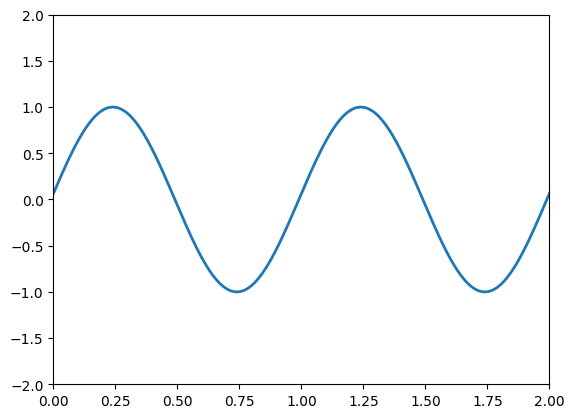

In [3]:
## przykład tworzenia animacji z użyciem matplotlib.animation
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib import animation, rc


def animate():
    # przygotuj wykres do rysowania animacji
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # funkcja animacji, wywoływana sekwencyjnie
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # funkcja inicjalizacji, rysująca tło każdej klatki
    def init():
        line.set_data([], [])
        return (line,)
    
    # wywołanie animacji; blit=True  powoduje rysowanie tylko zmian
    anim = animation.FuncAnimation(
        fig, sin, init_func=init, frames=100, interval=20, blit=True
    )
    
    return anim.to_jshtml()

HTML(animate())


/home/piotr/projects/ai/pgm-l/l01-piotrdurniat/venv/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


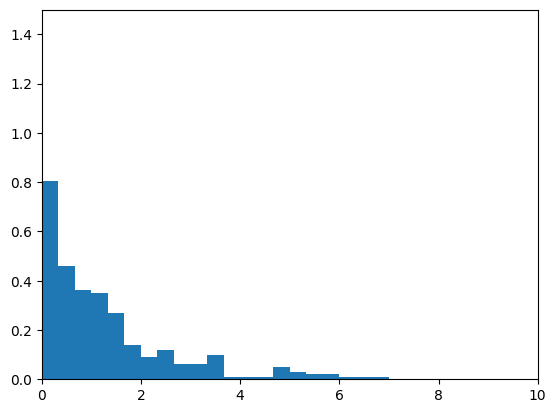

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pyro.distributions import Exponential

# Inicjalizacja rozkładu wykładniczego
lambda_param = 0.7
exponential_dist = Exponential(rate=lambda_param)


def animate_distribution():
    fig, ax = plt.subplots()

    # Ustawienie zakresów osi
    ax.set_xlim((0, 10))
    ax.set_ylim((0, 1.5))

    data = []
    (hist,) = ax.plot([], [], lw=2)

    # Funkcja rysująca kolejne klatki animacji
    def draw(i):
        sample = exponential_dist.sample().item()
        data.append(sample)
        ax.cla()
        ax.hist(data, bins=30, range=(0, 10), density=True)
        ax.set_xlim((0, 10))
        ax.set_ylim((0, 1.5))
        return (hist,)

    # Funkcja inicjalizująca
    def init():
        ax.hist([], bins=30, range=(0, 10), density=True)
        return (hist,)

    # Wywołanie animacji
    anim = animation.FuncAnimation(
        fig, draw, init_func=init, frames=200, interval=100, blit=False
    )

    return anim.to_jshtml()


from IPython.display import HTML

HTML(animate_distribution())

Tak jak wspomniano wcześniej, w Pyro funkcje stochastyczne mogą zawierać zarówno odwołania do podstawowych funkcji stochastycznych `pyro.distributions`, jak i deterministyczny kod pythonowy, co pozwala na modelowanie różnych doświadczeń losowych. Przykładowo, w poniższej komórce znajduje się model doświadczenia losowego, przedstawionego na początku notatnika.


In [9]:
# doświadczenie losowe: wylosuj pudełko, a następnie z niego wylosuj owoc
def get_fruit(box_proba=0.45, red_box_proba=0.4, blue_box_proba=0.7):
    boxes = ["r", "b"]
    fruit = ["a", "o"]
    box_idx = pyro.sample("box", dist.Bernoulli(box_proba))
    if box_idx == 0:
        fruit_idx = pyro.sample("fruit", dist.Bernoulli(red_box_proba))
    else:
        fruit_idx = pyro.sample("fruit", dist.Bernoulli(blue_box_proba))
    return boxes[int(box_idx)], fruit[int(fruit_idx)]


for _ in range(5):
    box, fruit = get_fruit()
    print(f"Wylosowano '{fruit}' z pudełka '{box}'")

Wylosowano 'a' z pudełka 'b'
Wylosowano 'a' z pudełka 'b'
Wylosowano 'a' z pudełka 'r'
Wylosowano 'o' z pudełka 'b'
Wylosowano 'o' z pudełka 'r'


Dzięki temu możliwe jest stworzenie symulatora, który powtórzy doświadczenie dostatecznie dużą liczbę razy w celu numerycznego przybliżenia prawdopodobieństw, które wcześniej wyznaczyliśmy obliczając je ręcznie.


In [10]:
# powtórz doświadczenie dużą liczbę razy i aproksymuj prawdopodobieństwa
total = 10_000
n_boxes = {"r": 0, "b": 0}
n_fruit = {"a": 0, "o": 0}
for _ in range(total):
    box, fruit = get_fruit()
    n_boxes[box] += 1
    n_fruit[fruit] += 1


display(Math(f"$$\Pr(B=r)\simeq{n_boxes['r'] / total:.3f}$$"))
display(Math(f"$$\Pr(B=b)\simeq{n_boxes['b'] / total:.3f}$$"))
display(Math(f"$$\Pr(F=a)\simeq{n_fruit['a'] / total:.3f}$$"))
display(Math(f"$$\Pr(F=o)\simeq{n_fruit['o'] / total:.3f}$$"))
print("itd.")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

itd.


### Zadanie 1.6 (1,5 p.)

Rozważmy doświadczenie losowe: student aplikował na 9 kierunków. Szanse przyjęcia dla każdego z kierunków są równe i wynoszą 1%. Niestety, student nie został przyjęty na żaden z kierunków. Jakie jest prawdopodobieństwo takiej sytuacji? Wybierz odpowiedni rozkład prawdopodobieństwa i oblicz prawdopodobieństwo ręcznie, wpisując tok rozumowania do następnej komórki oraz przypisując wynik do zmiennej `p_reject`. Zamodeluj doświadczenie w formie symulatora uzupełniając funkcję `attempt_join_university`, która wykona doświadczenie losowe, oraz funkcję `simulate_join_university`, która wykona to doświadczenie zadaną liczbę razy i zwróci prawdopodobieństwo opisywanego zdarzenia.


- prawdopodobieństwo odrzucenia na każdy kierunek z osobna $1-0.01 = 0.99$
- każda z 9 prób jest niezależna
- są dwa możliwe wyniki próby:
  - przyjęcie z prawdopodobieństwem $p_{admission} = 0.01$
  - odrzucenie z prawdopodobieństwem $1 - p_{admission} = 0.99$
- rozkład Bernoulliego

Prawdopodobieństwo odrzucenia na wszystkich kierunkach:

$$
p_{reject} = (1-p_{admission})^9 = 0.99^9 = 0.91352
$$


In [1]:
p_join_one = 0.01
p_reject_one = 1 - p_join_one
application_count = 9

p_reject = p_reject_one**application_count

In [5]:
display(Math(f"$$\Pr(reject)={p_reject:.5f}$$"))

# testy ukryte

<IPython.core.display.Math object>

In [10]:
def attempt_joint_faculty(p_admission):
    """
    Funkcja modelująca doświadczenie losowe dla jednego kierunku.
    """
    return pyro.sample("application", dist.Bernoulli(p_admission))


def attempt_join_university(n_trials=9, p_admission=0.01):
    """
    Funkcja stochastyczna modelująca doświadczenie losowe.
    Zwraca 1 jeśli student został odrzucony na wszystkie kierunki.
    """
    return all(attempt_joint_faculty(p_admission) == 0 for _ in range(n_trials))


def simulate_join_university(n_simulations=10_000):
    """Wykonaj doświadczenie losowe określoną liczbę.
    Zwraca przybliżone prawdopodobieństwo nie przyjęcia na żaden z kierunków
    przy zadanej liczbie prób.
    """
    n_rejected = 0
    for _ in range(n_simulations):
        if attempt_join_university() == 1:
            n_rejected += 1

    return n_rejected / n_simulations

In [11]:
display(Math(f"$$\Pr(reject)\simeq{simulate_join_university():.5f}$$"))

# testy ukryte

<IPython.core.display.Math object>

### Zadanie 1.7 (1,5 p.)

Przygotuj symulator dla zadania 1.4. Sprawdź, jak czułość i swoistość testu oraz prawdopodobieństwo choroby wpływają na osiągany wynik. Wykonaj wizualizację zależności prawdopodobieństwa bycia chorym przy pozytywnym wyniku testu od ww. parametrów.


In [ ]:
# TU WPISZ KOD
raise NotImplementedError()